In [54]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np

In [55]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import train_test_split

In [56]:
df=pd.read_csv('covid.csv',parse_dates=["Date"])

In [57]:
df.head()

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-22,Albania,0,0,0
2,2020-01-22,Algeria,0,0,0
3,2020-01-22,Andorra,0,0,0
4,2020-01-22,Angola,0,0,0


In [58]:
df.dtypes        #checking datatypes of all columns

Date         datetime64[ns]
Country              object
Confirmed             int64
Recovered             int64
Deaths                int64
dtype: object

In [59]:
df.shape

(1128, 5)

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1128 entries, 0 to 1127
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1128 non-null   datetime64[ns]
 1   Country    1128 non-null   object        
 2   Confirmed  1128 non-null   int64         
 3   Recovered  1128 non-null   int64         
 4   Deaths     1128 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 44.2+ KB


In [61]:
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

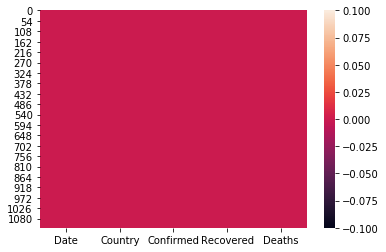

In [62]:
sns.heatmap(df.isnull())  #checking null values in dataset using heatmap

In [63]:
from sklearn.preprocessing import LabelEncoder

In [64]:
le=LabelEncoder()

In [65]:
df["Country"]=le.fit_transform(df["Country"])

In [66]:
df["Country"]

0         0
1         1
2         2
3         3
4         4
       ... 
1123    183
1124    184
1125    185
1126    186
1127    187
Name: Country, Length: 1128, dtype: int32

In [67]:
df["Country"].unique()  #checking unique values for country

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [68]:
df.dtypes

Date         datetime64[ns]
Country               int32
Confirmed             int64
Recovered             int64
Deaths                int64
dtype: object

In [69]:
#visualizing the data

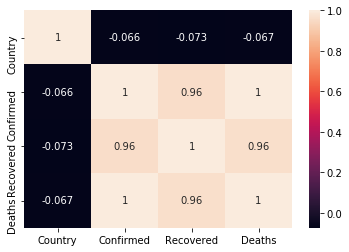

In [70]:
sns.heatmap(df.corr(),annot=True)

In [71]:
df.skew()

Country       0.000000
Confirmed    19.013047
Recovered    15.000762
Deaths       18.932635
dtype: float64

Text(0, 0.5, 'confirmed cases')

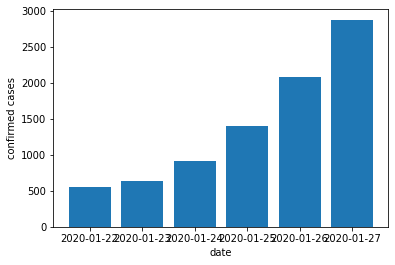

In [72]:
plt.bar(df['Date'],df['Confirmed'])
plt.xlabel("date")
plt.ylabel("confirmed cases")

In [73]:
df.columns

Index(['Date', 'Country', 'Confirmed', 'Recovered', 'Deaths'], dtype='object')

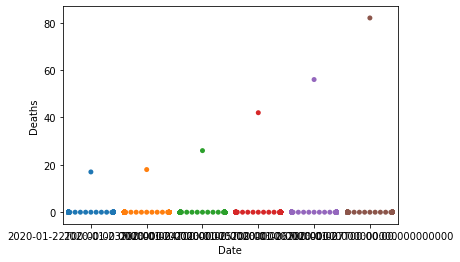

In [74]:
sns.swarmplot(df["Date"],df["Deaths"])

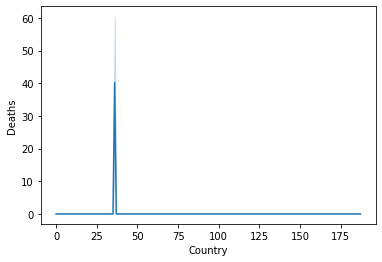

In [75]:
sns.lineplot(x="Country",y="Deaths",data=df)

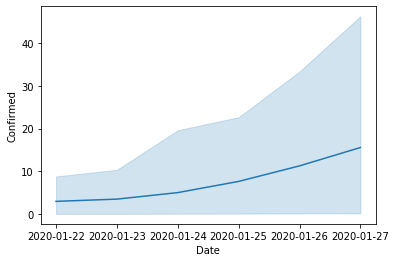

In [76]:
sns.lineplot(x="Date",y="Confirmed",data=df)

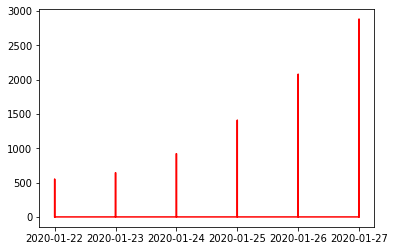

In [77]:
plt.plot(df["Date"],df["Confirmed"],linestyle="-",color='red')

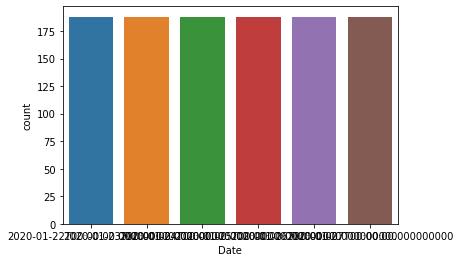

In [78]:
sns.countplot(df["Date"])

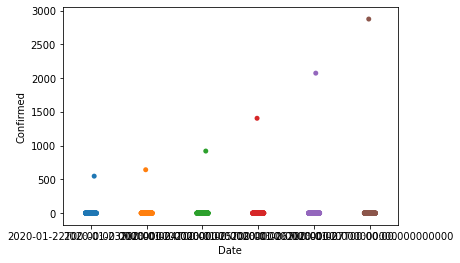

In [79]:
sns.stripplot(df["Date"],df["Confirmed"])

In [80]:
#checking the outliers
from scipy.stats import zscore

In [81]:
z1=df.iloc[:,1:]
z=np.abs(zscore(z1))

In [82]:
print(np.where(z>3))

(array([ 36,  36,  36, 224, 224, 224, 412, 412, 412, 600, 600, 600, 788,
       788, 788, 976, 976, 976], dtype=int64), array([1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3], dtype=int64))


In [83]:
df_new=z1[(z<3).all(axis=1)]

In [84]:
df_new.shape

(1122, 4)

In [85]:
df.shape

(1128, 5)

In [86]:
df.drop("Date",axis=1,inplace=True)

In [87]:
df

,Country,Confirmed,Recovered,Deaths
0,0,0,0,0
1,1,0,0,0
2,2,0,0,0
3,3,0,0,0
4,4,0,0,0
...,...,...,...,...
1123,183,0,0,0
1124,184,0,0,0
1125,185,0,0,0
1126,186,0,0,0


In [88]:
x=df.drop("Deaths",axis=1)

In [93]:
y=df["Deaths"].values
y=y.reshape(-1,1)

In [94]:
x.columns

Index(['Country', 'Confirmed', 'Recovered'], dtype='object')

In [96]:
y.shape

(1128, 1)

In [97]:
x.shape

(1128, 3)

In [98]:
max_r2_score=0
for r_state in range(42,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.33)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    r_score=r2_score(pred,y_test)
    print("r2 score for the random state ",r_state,"is ",r_score)
    if max_r2_score<r_score:
        max_r2_score=r_score
        final_r_state=r_state
        
print('\n')
print('\n')

print("the max r2 score for the final random state:",final_r_state,"is: ",max_r2_score)

r2 score for the random state  42 is  -0.00047600940225644983
r2 score for the random state  43 is  0.9985200715127956
r2 score for the random state  44 is  0.9973799914179188
r2 score for the random state  45 is  0.9941580441078756
r2 score for the random state  46 is  0.9966617196468984
r2 score for the random state  47 is  0.9982736438098644
r2 score for the random state  48 is  0.9982176453736799
r2 score for the random state  49 is  0.9982003114309254
r2 score for the random state  50 is  0.9982271886735831
r2 score for the random state  51 is  -0.0034787796775874735
r2 score for the random state  52 is  -0.0016798842183858298
r2 score for the random state  53 is  0.9915717472862469
r2 score for the random state  54 is  0.9966842671606063
r2 score for the random state  55 is  0.996084701360912
r2 score for the random state  56 is  0.9990016703087777
r2 score for the random state  57 is  0.9992669194546628
r2 score for the random state  58 is  0.9992213661927307
r2 score for the ra

In [100]:
#finalising the model using random state as 57

In [101]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=57,test_size=0.33)

In [102]:
lr=LinearRegression()

In [104]:
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [105]:
predlr=lr.predict(x_test)

In [106]:
print(y_test)

[[ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0

In [109]:
print(predlr)

[[-7.98091417e-03]
 [-8.95293229e-03]
 [ 3.35240806e-04]
 [-2.47281152e-03]
 [-8.73692826e-03]
 [-2.47281152e-03]
 [-9.38494034e-03]
 [-8.84493027e-03]
 [-7.06289706e-03]
 [-4.79485480e-03]
 [-8.30492021e-03]
 [-4.90285681e-03]
 [-6.30688297e-03]
 [-7.00889606e-03]
 [-6.90778315e-04]
 [-8.57492524e-03]
 [-6.68489002e-03]
 [-5.22686285e-03]
 [ 5.51244831e-04]
 [-9.06093430e-03]
 [-7.11689807e-03]
 [-5.65887090e-03]
 [-5.65887090e-03]
 [-1.28478938e-03]
 [-3.87683769e-03]
 [-4.09284171e-03]
 [-1.12278637e-03]
 [-5.82776302e-04]
 [-6.14487996e-03]
 [-6.30688297e-03]
 [-7.65690813e-03]
 [ 1.12347679e-05]
 [-1.82479945e-03]
 [-3.12771270e-04]
 [-6.84689304e-03]
 [-3.28282662e-03]
 [-7.33290210e-03]
 [-6.09087895e-03]
 [-5.28775296e-04]
 [-7.60290713e-03]
 [-6.57688801e-03]
 [-9.38494034e-03]
 [-1.28478938e-03]
 [-5.76687291e-03]
 [-2.79681756e-03]
 [-2.85081857e-03]
 [-2.58770264e-04]
 [-8.03491518e-03]
 [-6.14487996e-03]
 [-3.55283165e-03]
 [-4.79485480e-03]
 [ 3.89241812e-04]
 [-8.4129222

In [110]:
lr.coef_

array([[-5.40010063e-05,  2.72565278e-02,  4.39999948e-02]])

In [111]:
lr.intercept_

array([0.00071325])

In [112]:
print(r2_score(predlr,y_test))

0.9992669194546628


In [113]:
print(mean_absolute_error(y_test,predlr))

0.008338189857299524


In [116]:
print((mean_squared_error(y_test,predlr)))

0.0013933355913279882


In [118]:
#regularising the model

In [119]:
from sklearn.model_selection import cross_val_score

In [121]:
score=cross_val_score(lr,x,y,cv=5).mean()

In [122]:
score

0.9973869770855712

In [123]:
#serialisation and deserialisation of model

In [125]:
import pickle

In [128]:
filename='covid19.pkl'

In [136]:
pickle.dump(lr,open(filename,'wb'))  #saving the model

In [137]:
#pkl=pickle.load(open(filename,'rb'))
#pkl.predict(x_test)